In [118]:
%config InlineBackend.figure_format = 'svg'
import math
import matplotlib.pyplot as plt
import pandas as pd
import oscovida as ov

In [119]:
cases, deaths = ov.get_country_data("Germany")
#ov.clear_cache()

In [130]:
def compute_doubling_time_1w(series:pd.Series) -> float:
    """Strategy:
    - average over the last 7 days, call this value s_7
    - average over the last 7 days before that, call this value s_14
    Use s_7 and s_14 to estimate the doubling time (assuming exponential growth).
    [Maybe Repeat this in a rolling fashion.]
    """
    s7 = series[-7:].mean()
    s14 = series[-14:-7].mean()

    
    # special cases: 
    if s7 == s14:
        # no change, infinite doubling period
        return math.inf
        
    ratio = s7/s14
        
    if s14 == 0:
        print(s7)
    if pd.notna(ratio):
        dtime = ov.double_time_exponential(ratio, t2_minus_t1=7)
    else:
        raise ValueError(f"ratio = {ratio}, s7={s7}, s14={s14}")
        
    return dtime
    
def compute_growth_factor_1w(series):
    """Strategy:
    - average over the last 7 days, call this value s_7
    - average over the last 7 days before that, call this value s_14
    Divide s_7 by s_14
    """
    s7 = series[-7:].mean()
    s14 = series[-14:-7].mean()
    return s7/s14
    

In [131]:
dtime_table = pd.Series(dtype=float)

for country in country_names:
    cases, deaths = ov.get_country_data(country)
    dtime_table[country] = compute_doubling_time_1w(cases.diff())
    
    

<ipython-input-130-ecf4e1657a98>:17: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = s7/s14


1.5714285714285714
0.7142857142857143


In [27]:
dtime = compute_doubling_time_1w(cases.diff())

In [125]:
np.log(1)

0.0

In [111]:
import math

In [113]:
pd.notna(math.nan)

False

In [102]:
import numpy as np

In [16]:
dtime

15.881598513235144

In [14]:
s7/s14

1.3829526335300995

In [19]:
compute_growth_factor_1w(cases.diff())

1.3573207419361266

In [91]:
def compute_doubling_time_1w_series(series: pd.Series):
    """Strategy:
    - average over the last 7 days, call this value s_7
    - average over the last 7 days before that, call this value s_14
    Use s_7 and s_14 to estimate the doubling time (assuming exponential growth).
    [Maybe Repeat this in a rolling fashion.]
    """
    s7 = series[-7:].mean()
    s14 = series[-14:-7].mean()
    dtime = ov.double_time_exponential(s7/s14, t2_minus_t1=7)
    
    series7 = series.rolling(7).mean()
    series14 = series7.shift(7)
    ratio = series7 / series14
    # drop NaNs from dividing by zero
    ratio = ratio.dropna()
    # drop zeros from ?
    ratio2 = ratio[~(ratio==0)]
    
    double_time = ov.double_time_exponential(ratio2, t2_minus_t1=7)
    
    return double_time, ratio2


In [92]:
dtime, ratio2 = compute_doubling_time_1w_series(cases.diff())

/Users/fangohr/anaconda3/envs/oscovida/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


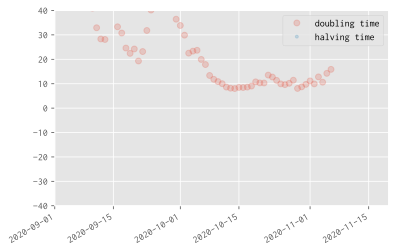

In [79]:
fig, ax = plt.subplots()
doubling_time = dtime[dtime>0]
halving_time = dtime[dtime<0]
ax.plot(doubling_time.index, doubling_time.values, 'o', label="doubling time", alpha=0.2)
ax.plot(halving_time.index, halving_time.values, '.', label="halving time", alpha=0.2)
ax.set_ylim([-40, 40])
ax.set_xlim(left=pd.to_datetime("2020-09-01"))
ax.legend()
fig.autofmt_xdate()


## for all countries

In [84]:
world = ov.fetch_cases()
country_names = sorted(world.index.drop_duplicates())


In [121]:
dtime_table = pd.Series(dtype=float)

for country in country_names:
    cases, deaths = ov.get_country_data(country)
    dtime_table[country] = compute_doubling_time_1w(cases.diff())
    
    

<ipython-input-120-10bb02c1e873>:10: RuntimeWarning: invalid value encountered in double_scalars
  ratio = s7/s14
/Users/fangohr/git/oscovida/oscovida/oscovida.py:64: RuntimeWarning: divide by zero encountered in log
  return t2_minus_t1 * np.log(2) / np.log(q2_div_q1)
/Users/fangohr/git/oscovida/oscovida/oscovida.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  return t2_minus_t1 * np.log(2) / np.log(q2_div_q1)
<ipython-input-120-10bb02c1e873>:10: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = s7/s14
/Users/fangohr/git/oscovida/oscovida/oscovida.py:64: RuntimeWarning: invalid value encountered in log
  return t2_minus_t1 * np.log(2) / np.log(q2_div_q1)


In [123]:
dtime_table

Afghanistan          -520.780815
Albania                22.585239
Algeria                10.940501
Andorra               -16.834827
Angola               -128.639365
                         ...    
West Bank and Gaza     28.253861
Western Sahara               inf
Yemen                   5.295296
Zambia                 20.815777
Zimbabwe              129.776693
Length: 190, dtype: float64

In [122]:
dtime_table[dtime_table <0]

Afghanistan            -520.780815
Andorra                 -16.834827
Angola                 -128.639365
Antigua and Barbuda      -9.498408
Argentina               -23.830839
                           ...    
United Arab Emirates    -50.126989
United Kingdom         -393.466757
Uruguay                 -42.304929
Uzbekistan              -20.987629
Venezuela               -87.423667
Length: 69, dtype: float64

In [81]:
c.shape

(268, 293)

In [82]:
c.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Australia',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=268)